## NWP Monod Kinetic Model
This notebook calculates Monod half-saturation constants for oxygen removal on a coal substrate in 
the ___________ batch respirometry tests at Enviromin, Inc. in Bozeman, MT.
Copyright Enviromin, Inc. 2019

In [3]:
import pandas as pd
import numpy as np
import xlrd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import lmfit
from scipy.optimize import curve_fit
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
from datetime import datetime
# from sklearn import linear_model

In [190]:
# import data
nit = pd.read_excel('/home/g/Dropbox (Enviromin)/All/Shared/Projects/NWP Coal Canada/Respirometry/Respirometry Work.xlsx', sheet_name='Computer read file')

In [191]:
# fiddle with data so it looks right
# We want it to be terms of initial velocity and concentration
# (here in %O2/time and % substrate, which is maybe invalid)
# and if you have different temperatures, those as well
df = nit[['conc', 'V']]
df = df.reset_index()
df.columns = ['Temp', 'C', 'Vo']

In [193]:
"""
Data we want to fit:
xdata, ydata"""
# df = df[df.Temp==10]
xdata = df['C']
ydata = df['Vo']

def monod_contin(S, mmax, Ks):
    mu = (mmax*S)/(Ks+S) # returns mu
    return(mu)

In [194]:
idx = df.Temp.unique()
plotresults = pd.DataFrame()
predresults = pd.DataFrame()
results = pd.DataFrame()
pred = pd.DataFrame()
res = pd.DataFrame()
foo = pd.DataFrame()

a = pd.DataFrame()

for i in range(len(idx)):
    data = df[df.Temp==idx[i]].reset_index(drop=True)
    
    xdata = data['C']
    ydata = data['Vo']
    params, pcov = curve_fit(monod_contin, xdata, ydata)

    mufit = np.linspace(0,xdata.iloc[-1])
    fit = monod_contin(mufit, params[0], params[1])
    
    foo['C'] = xdata
    foo['Vo'] = ydata
    foo['Index'] = idx[i]
    foo['mmax'] = params[0]
    foo['Ks'] = params[1]
    
    pred['C'] = mufit
    pred['Vo'] = fit
    pred['Index'] = idx[i]
    pred['mmax'] = params[0]
    pred['Ks'] = params[1]
    
    plotresults = plotresults.append(foo)
    predresults = predresults.append(pred)
    results = results.append(res)
    
    

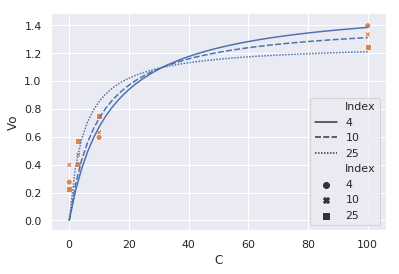

In [197]:
sns.scatterplot(x=xdata, y=ydata)
# plotpred = pred.reset_index()
sns.lineplot(data=predresults, x='C', y='Vo', style='Index')
sns.scatterplot(x='C', y='Vo', data=plotresults, style='Index')

In [203]:
predresults[predresults.Index==10].to_csv('predicted_o2.csv')

In [202]:
pwd

'/home/g/Desktop/Enviromin/_NWP'